## Bitcoin Analysis

The following notebook includes the analysis and exploration of the bitcoin price.

In addition, there are some visualization graphs to compare with tweet sentiment from the 'tweets_scores.csv' file.

### Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mod_btc import crosscorr, plot_correlation
from sklearn import preprocessing

**Read BTC-USD dataset:**

The dataset includes the price from 2021-Jan to 22-February

In [2]:
directory = '~/PycharmProjects/tfm_hugopobil'
btc = pd.read_csv(f'{directory}/data/BTC-USD.csv', low_memory=False)
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
btc['Date'][0], btc['Date'][len(btc)-1]

('2014-09-17', '2022-01-28')

Read the file:

In [4]:
tweets = pd.read_csv(f'{directory}/data/tweets_scores.csv', low_memory=False)

In [5]:
btc.Date = pd.to_datetime(btc.Date)

<AxesSubplot:>

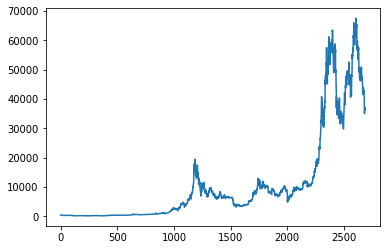

In [6]:
btc['Adj Close'].plot()

In [7]:
tweets = tweets.drop_duplicates()
tweets['date'] = pd.to_datetime(tweets['date'])
tweets.index = tweets['date']

In [8]:
tweets_grouped = tweets.resample('1h').sum() # Change frequency to days or hours

In [9]:
tweets_grouped

,Unnamed: 0,index,user_followers,user_friends,user_favourites,user_verified,compound,scores,score
date,,,,,,,,,
2021-02-05 11:00:00,5338,21490,319.0,135.0,455.0,0,0.4019,5.864525e+05,5.864525e+05
2021-02-05 12:00:00,30678,42670,3950.0,7.0,13.0,0,-0.2023,-8.732077e+04,-8.732077e+04
2021-02-05 13:00:00,18558,21236,192.0,920.0,146.0,0,0.5538,1.571186e+05,1.571186e+05
2021-02-05 14:00:00,4190,21112,601.0,496.0,661.0,0,0.0000,0.000000e+00,0.000000e+00
2021-02-05 15:00:00,27889,41722,6707.0,4956.0,8846.0,0,-1.1452,-2.321449e+08,-2.321449e+08
...,...,...,...,...,...,...,...,...,...
2022-03-02 19:00:00,99410,18755597,34878.0,29797.0,31033.0,0,5.2847,6.205812e+09,6.205812e+09
2022-03-02 20:00:00,74572,14060407,188846.0,6882.0,20563.0,0,1.0972,1.118114e+07,1.118114e+07
2022-03-02 21:00:00,67716,11713696,7244.0,3695.0,21546.0,0,1.8887,4.999928e+07,4.999928e+07


In [10]:
btc_usd = btc.copy()
btc_usd['Date'] = pd.to_datetime(btc_usd['Date'], unit='s')
btc_usd.index = btc_usd['Date']

In [11]:
btc_usd_grouped = btc_usd.resample('D')['Adj Close'].mean()

## Plot tweets scores and BTC price

In [12]:
beg = max(tweets_grouped.index.min().replace(tzinfo=None),
          btc_usd_grouped.index.min())

end = min(tweets_grouped.index.max().replace(tzinfo=None),
          btc_usd_grouped.index.max())

tweets_grouped = tweets_grouped[beg:end]
btc_usd_grouped = btc_usd_grouped[beg:end]

#### Compound Score:

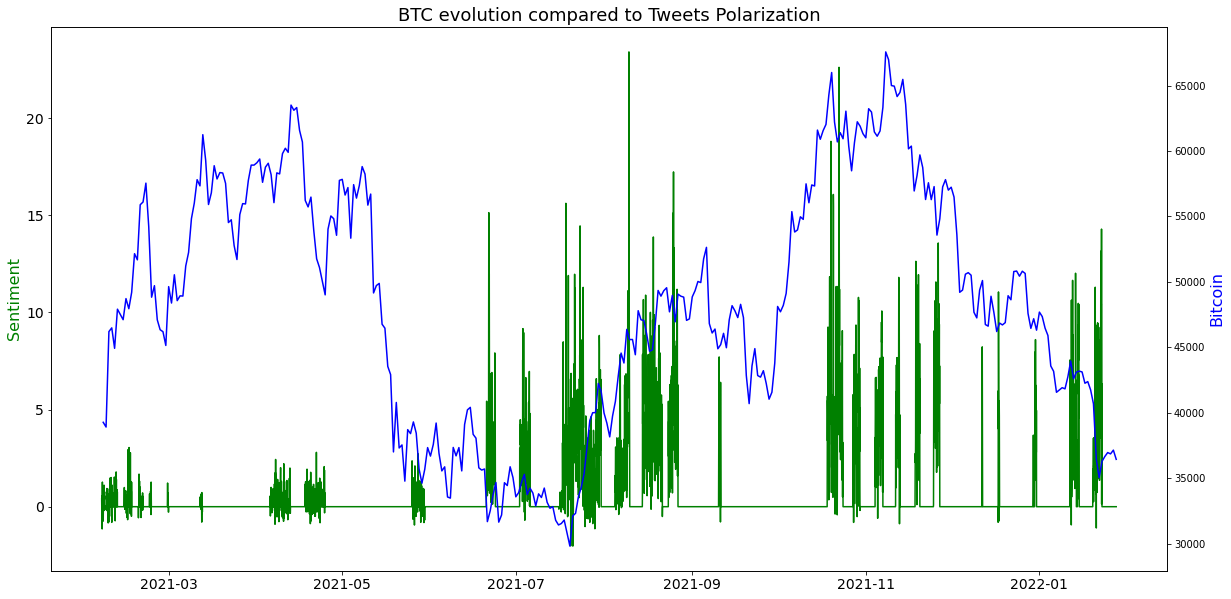

In [20]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('BTC evolution compared to Tweets Polarization', fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot(tweets_grouped.compound, 'g-') # switch between compound and scores
ax2.plot(btc_usd_grouped, 'b-')
# ax2.axis_date(btc_usd_grouped.index, btc_usd_grouped, 'b-')

# Add color to labels
ax1.set_ylabel('Sentiment', color='g', fontsize=16)
ax2.set_ylabel('Bitcoin', color='b', fontsize=16)
plt.show()

# Meter leyenda!

#### Followers * Favourites Score:

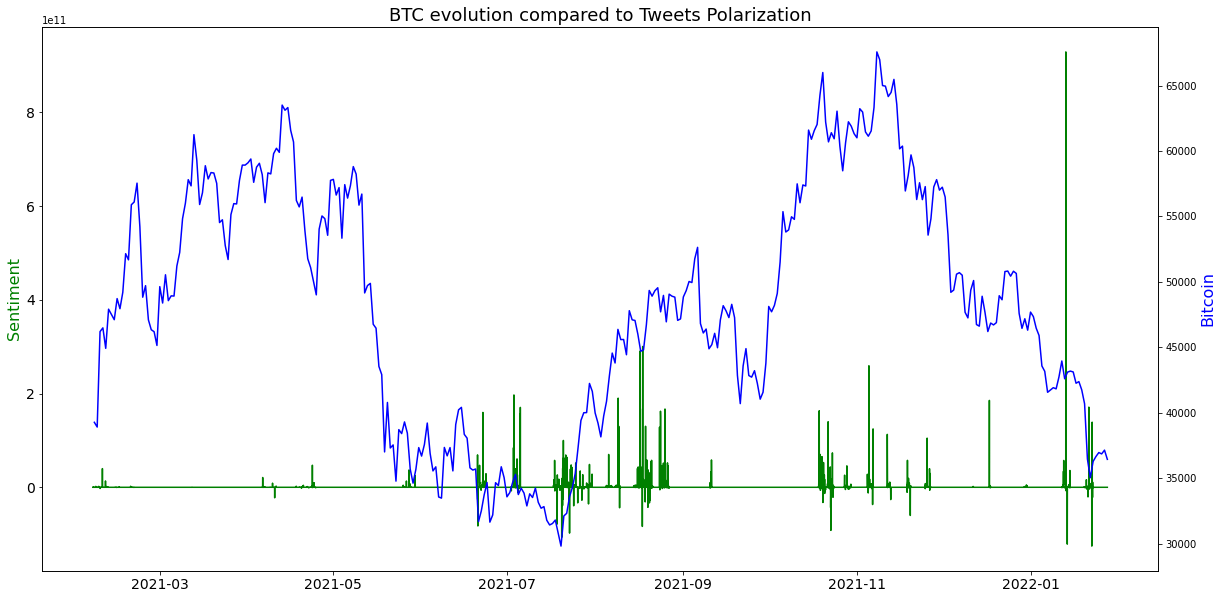

In [19]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('BTC evolution compared to Tweets Polarization', fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot(tweets_grouped.score, 'g-') # switch between compound and scores
ax2.plot(btc_usd_grouped, 'b-')
# ax2.axis_date(btc_usd_grouped.index, btc_usd_grouped, 'b-')

# Add color to labels
ax1.set_ylabel('Sentiment', color='g', fontsize=16)
ax2.set_ylabel('Bitcoin', color='b', fontsize=16)
plt.show()

# Meter leyenda!

### Save data to local

In [90]:
tweets_grouped.to_csv(f'{directory}/data/tweets_grouped.csv')
btc_usd_grouped.to_csv(f'{directory}/data/btc_usd_grouped.csv')

## Correlations

Plot correlations to compare compound and score!

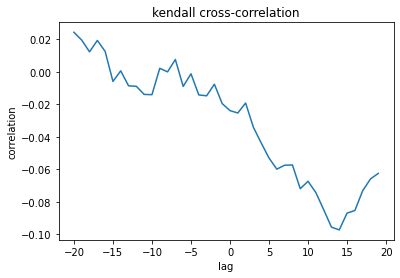

In [91]:
plot_correlation(tweets = tweets_grouped,
                 bitcoin = btc_usd_grouped,
                 method = 'kendall')

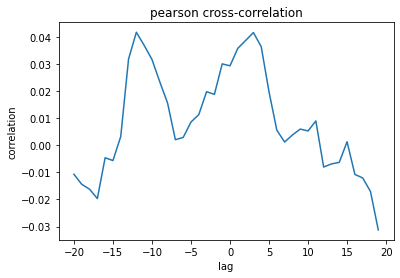

In [92]:
plot_correlation(tweets = tweets_grouped,
                 bitcoin = btc_usd_grouped,
                 method = 'pearson')

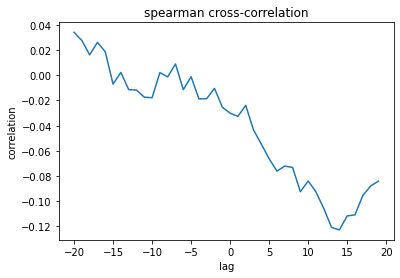

In [93]:
plot_correlation(tweets = tweets_grouped,
                 bitcoin = btc_usd_grouped,
                 method = 'spearman')

## Normalization

/var/folders/79/vrkgvtgs11v73pnty27_x1100000gn/T/ipykernel_7512/1917682762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_grouped['normalized_score'] = score_scaled


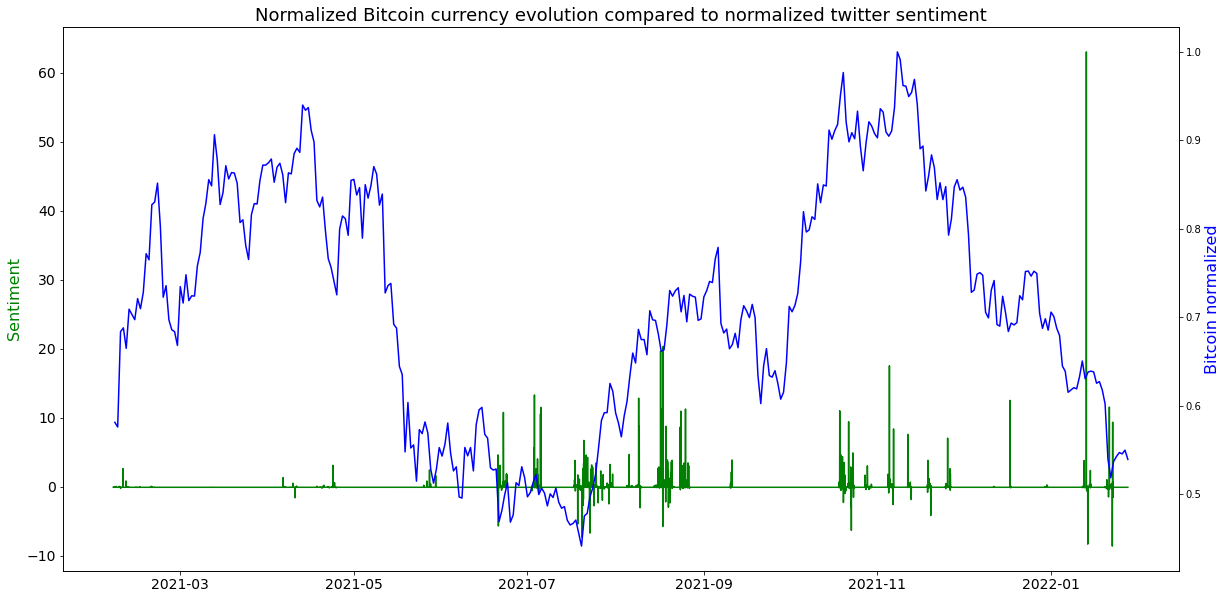

In [94]:
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(tweets_grouped['score'].values.reshape(-1, 1))

tweets_grouped['normalized_score'] = score_scaled
crypto_used_grouped_scaled = btc_usd_grouped / max(btc_usd_grouped.max(), abs(btc_usd_grouped.min()))

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title("Normalized Bitcoin currency evolution compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped['normalized_score'], 'g-')
ax2.plot_date(btc_usd_grouped.index, crypto_used_grouped_scaled, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='b', fontsize=16)
plt.show()

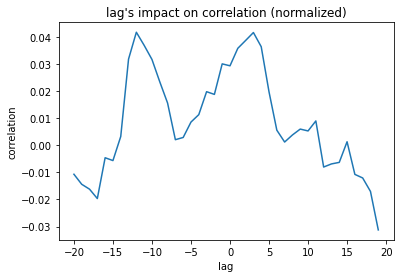

In [95]:
xcov = [crosscorr(detax=tweets_grouped,
                  detay=btc_usd_grouped,
                  method='pearson',
                  lag=i) for i in range(-20,20)]

plt.plot(range(-20,20), xcov)
plt.title("lag's impact on correlation (normalized)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

## Derivative of Bitcoin's Price

In [96]:
# Derivative
tweets_grouped_derivative = pd.Series(np.gradient(
    tweets_grouped['normalized_score'].values),
    tweets_grouped.index,
    name='slope')

btc_usd_grouped_derivative = pd.Series(np.gradient(
    btc_usd_grouped.values),
    btc_usd_grouped.index,
    name='slope')

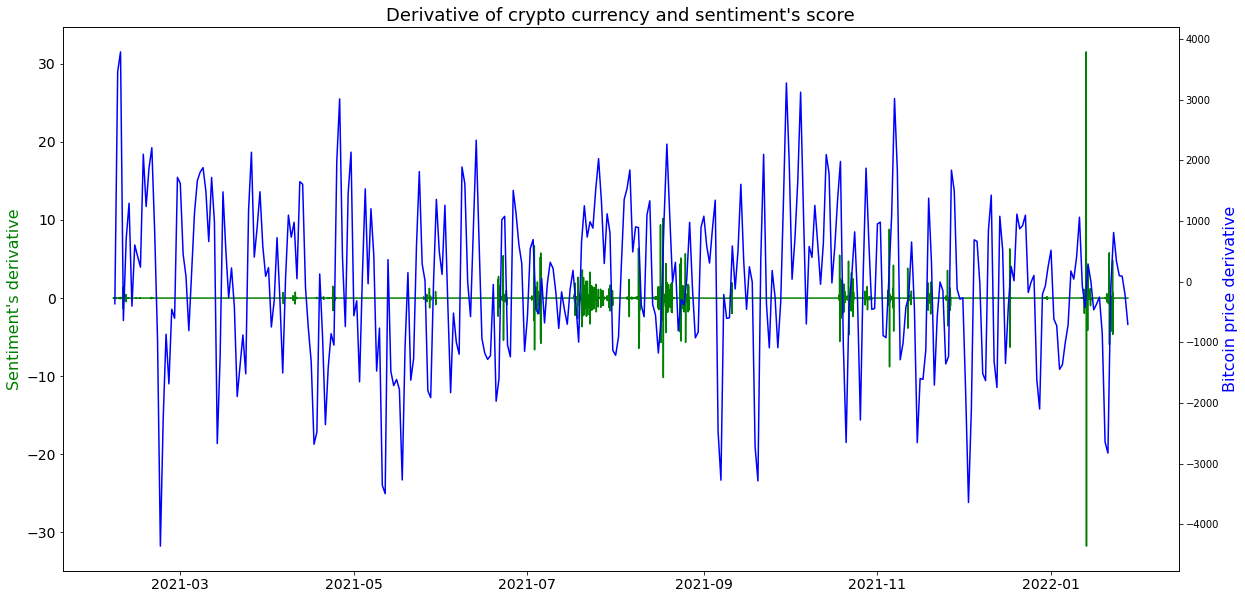

In [97]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Derivative of crypto currency and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_derivative.index, tweets_grouped_derivative, 'g-')
ax2.plot_date(btc_usd_grouped_derivative.index, btc_usd_grouped_derivative, 'b-')

ax1.set_ylabel("Sentiment's derivative", color='g', fontsize=16)
ax2.set_ylabel('Bitcoin price derivative', color='b', fontsize=16)
plt.show()

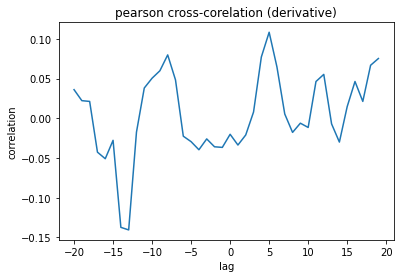

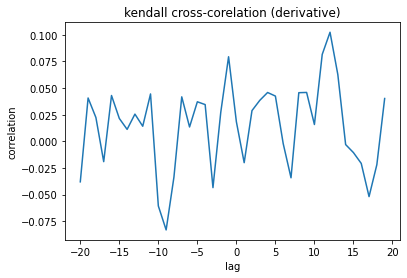

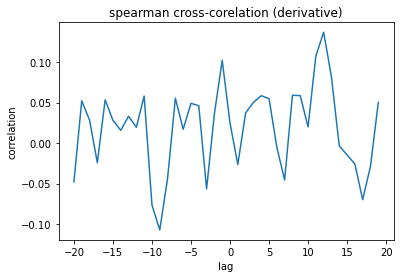

In [100]:
xcov = [crosscorr(tweets_grouped, btc_usd_grouped_derivative, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-corelation (derivative)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, btc_usd_grouped_derivative, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-corelation (derivative)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, btc_usd_grouped_derivative, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-corelation (derivative)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()